In [1]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

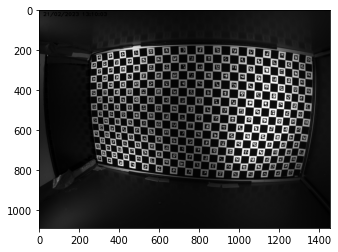

In [39]:
# img = cv2.imread('../output/captures/charuco/20230213T173741_top.png')
img = cv2.imread('../output/captures/20230221T131003_top.png')
plt.imshow(img)

In [40]:
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_1000)
board = cv2.aruco.CharucoBoard_create(16, 30, 1.4, .8, aruco_dict)
imboard = board.draw((2000*16//30, 2000))
# cv2.imwrite('/media/sil2/Data/regev/charuco_big.png', imboard)
# plt.imshow(imboard)

In [ ]:

# frame_markers = cv2.aruco.drawDetectedMarkers(img.copy(), corners, ids)
# plt.figure(figsize=(20, 15))
# plt.imshow(frame_markers, interpolation = "nearest")
# plt.show()
# sorted(ids)

In [41]:
with open('../output/calibrations/calib_params_top_null.pkl', 'rb') as f:
    res = pickle.load(f)

camera_matrix = res['mtx']
dist_coeffs = res['dist']

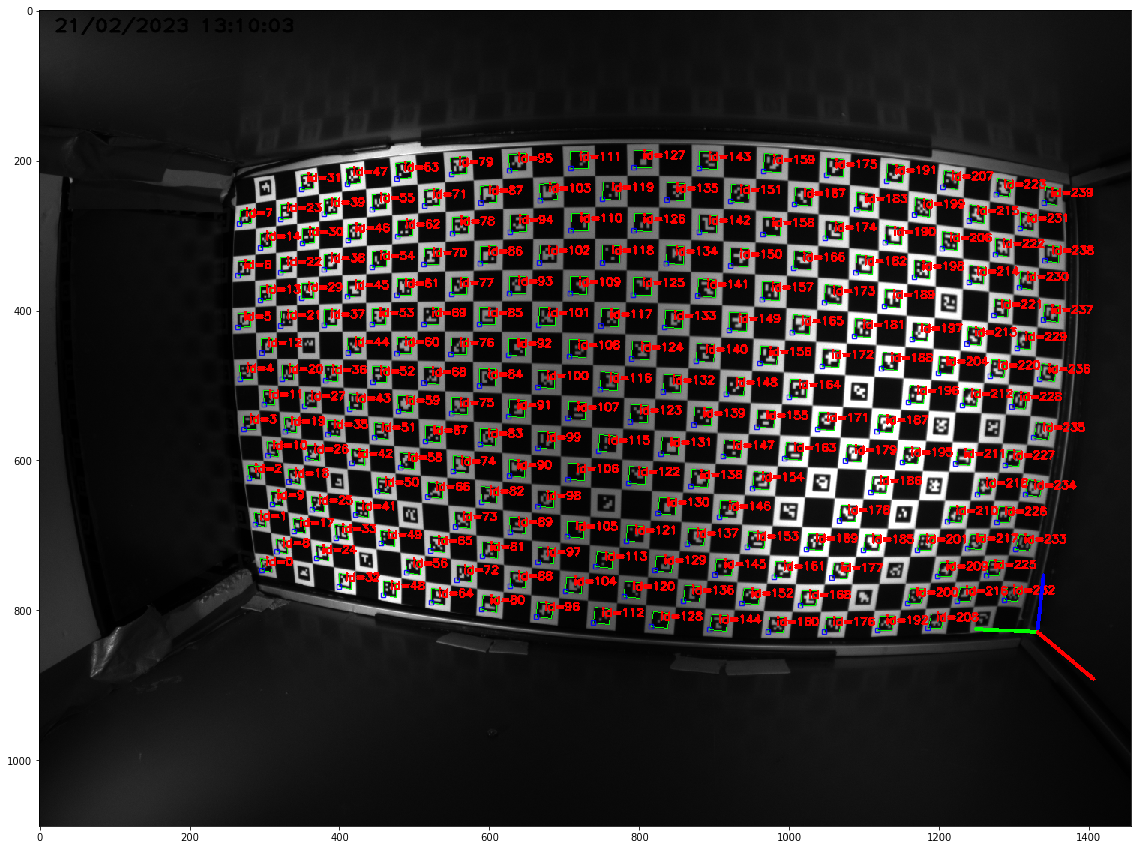

Num of Charuco found: 222
Missing markers IDs: [15, 16, 28, 34, 40, 57, 114, 162, 170, 180, 184, 193, 194, 202, 203, 205, 219, 224]


In [43]:
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)
# corners, ids = filter_markers(corners, ids)
if len(corners)>0:
    _, charuco_corners, charuco_ids = cv2.aruco.interpolateCornersCharuco(corners, ids, gray, board)
    # frame_markers = cv2.aruco.drawDetectedCornersCharuco(frame_markers, charuco_corners, charuco_ids, (0, 0, 255))
    retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charuco_corners, charuco_ids, board, camera_matrix, dist_coeffs,
                                                            None, None)
    frame_markers = cv2.aruco.drawDetectedMarkers(img.copy(), corners, ids)
    if retval:
         frame_markers = cv2.aruco.drawAxis(frame_markers, camera_matrix, dist_coeffs, rvec, tvec, 3)
    plt.figure(figsize=(20, 15))
    plt.imshow(frame_markers, interpolation = "nearest")
    plt.show()
    x = np.arange(240)
    print(f'Num of Charuco found: {len(ids)}')
    print(f'Missing markers IDs: {x[~np.isin(x, ids)].tolist()}')


In [68]:
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
# corners, ids = filter_markers(corners, ids)
if len(corners)>0:
    _, charuco_corners, charuco_ids = cv2.aruco.interpolateCornersCharuco(corners, ids, gray, board)
    # frame_markers = cv2.aruco.drawDetectedCornersCharuco(frame_markers, charuco_corners, charuco_ids, (0, 0, 255))
    retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charuco_corners, charuco_ids, board, camera_matrix, dist_coeffs,
                                                            None, None)
    frame_markers = cv2.aruco.drawDetectedMarkers(img.copy(), corners, ids)
    if retval:
         frame_markers = cv2.aruco.drawAxis(frame_markers, camera_matrix, dist_coeffs, rvec, tvec, 3)
    # plt.figure(figsize=(20, 15))
    # plt.imshow(frame_markers, interpolation = "nearest")
    # plt.show()
    x = np.arange(240)
    print(f'Num of Charuco found: {len(ids)}')
    print(f'Missing markers IDs: {x[~np.isin(x, ids)].tolist()}')


Num of Charuco found: 226
Missing markers IDs: [0, 7, 16, 24, 33, 51, 65, 81, 101, 184, 199, 214, 223, 229]


In [69]:
ret, mtx, dist, rvecs, tvecs = cv2.aruco.calibrateCameraCharuco(
  charucoCorners=charuco_corners,
  charucoIds=charuco_ids,
  board=board,
  imageSize=gray.shape,
  cameraMatrix=None,
  distCoeffs=None)

error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-r0utbq5z/opencv_contrib/modules/aruco/src/charuco.cpp:670: error: (-215:Assertion failed) nCorners > 0 && nCorners == _charucoCorners.getMat(i).total() in function 'calibrateCameraCharuco'


In [54]:
print(cv2.RQDecomp3x3(cv2.Rodrigues(rvec)[0])[0])

(-163.9418438095452, -22.23992068509273, 0.4697094703064225)


In [26]:
corners

[array([[[878.3358 , 639.8867 ],
         [902.1783 , 641.36786],
         [900.30133, 663.5542 ],
         [876.62225, 662.4133 ]]], dtype=float32),
 array([[[840.4332 , 599.0931 ],
         [864.4827 , 600.5726 ],
         [863.0918 , 623.41833],
         [839.2575 , 622.1183 ]]], dtype=float32),
 array([[[883.3948 , 561.34467],
         [907.69415, 562.72723],
         [906.16425, 586.3241 ],
         [881.88635, 585.2416 ]]], dtype=float32),
 array([[[844.3426 , 518.52576],
         [869.1139 , 519.90393],
         [867.6727 , 544.0564 ],
         [843.2614 , 542.7189 ]]], dtype=float32),
 array([[[887.641  , 479.60394],
         [912.42914, 480.7684 ],
         [911.20087, 505.34445],
         [886.5512 , 504.35303]]], dtype=float32),
 array([[[722.6676 , 472.04892],
         [746.86774, 473.1063 ],
         [746.2793 , 497.4435 ],
         [722.2977 , 496.24146]]], dtype=float32),
 array([[[847.6583 , 435.99442],
         [872.72595, 437.29187],
         [871.6051 , 462.072  ],
 